In [1]:
import pandas as pd

path_to_file = "./data/Orders.csv"
data = pd.read_csv(path_to_file)
print(data.shape)
data.head()

(51290, 24)


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [42]:
import re
def clean_prof_sales(x):
    empty_list = []
    for i in x:
        m = re.search('\d+\.\d+', i)
        empty_list.append(float(m.group()))
    return empty_list
        

In [44]:
# convert sales and profit to numeric
data.Sales = clean_prof_sales(data.Sales)


In [67]:
# order.date to datetime
from datetime import datetime
data['Order.Date']= [datetime.strptime(i,'%m/%d/%y') for i in data['Order.Date']]


In [93]:
# create month column
list = []
for i in data['Order.Date']:
    list.append(i.month)

    

In [95]:
data['Order.Month'] = list

In [240]:
orderXmonth = data.groupby(data['Order.Month']).sum()


In [241]:
orderXmonth

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.month
Order.Month,,,,,,,,
1,71468915,21500486.0,446789.30,8872,365.122,154219.79,71225.18900,13055
2,60085551,17761468.0,391650.21,7429,307.574,135692.84,59878.28000,11045
3,79093205,36758872.0,515518.34,10390,432.354,179759.09,76723.92404,15035
4,75926778,34498859.0,501978.86,10466,448.146,163570.53,75072.86600,15160
5,98261611,40926610.0,646493.24,13196,543.822,216750.57,102015.17500,18935
6,131905558,37416928.0,901081.29,18009,790.932,310825.29,136484.15800,26510
7,83547530,38467854.0,549306.46,11046,480.996,181809.56,83946.55136,15975
8,134609033,40569319.0,893315.55,17596,669.940,307882.98,136980.73600,25325
9,152061754,74350359.0,1000754.01,20479,817.468,342643.08,149609.70900,29790


In [122]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


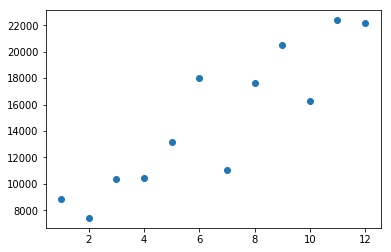

In [242]:
# plot orders per month
plt.scatter(y = orderXmonth['Quantity'], x= orderXmonth.index)

In [243]:
orderXcat = data.groupby(['Order.Month','Category']).sum()

In [244]:
orderXcat = orderXcat.reset_index(drop=False)

In [245]:
furn = orderXcat[orderXcat.Category == "Furniture"]

In [246]:
OS = orderXcat[orderXcat.Category == "Office Supplies"]
Tech = orderXcat[orderXcat.Category == "Technology"]

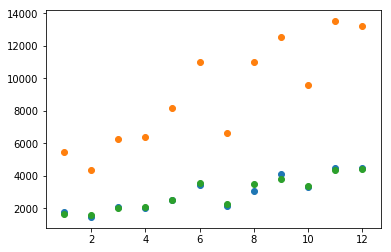

In [249]:
plt.scatter(y = furn['Quantity'], x= furn['Order.Month'])
plt.scatter(y = OS['Quantity'], x= OS['Order.Month'])
plt.scatter(y = Tech['Quantity'], x= Tech['Order.Month'])


In [ ]:
# - Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

# 	1. How much profit did we lose due to returns each year?


# 	2. How many customer returned more than once? more than 5 times?


# 	3. Which regions are more likely to return orders?


# 	4. Which categories (sub-categories) of products are more likely to be returned?

# - ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [255]:
path_to_file = "./data/Returns.csv"
returns = pd.read_csv(path_to_file)

In [258]:
returns=returns.rename(columns = {'Order ID':'Order.ID'})

In [259]:
merge = pd.merge(data, returns,  how='left', on = 'Order.ID')

In [274]:
returned = merge[merge.Returned.notnull()]

In [275]:
returned

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.month,Order.Month,Returned,Region_y
26,30191,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,715.16,2,0.00,720.36,725.570,Critical,5,12,Yes,Eastern Asia
53,30190,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,197.50,5,0.00,153.75,627.270,Critical,5,12,Yes,Eastern Asia
75,25438,IN-2015-JH158207-42140,2015-05-16,5/18/15,Second Class,JH-158207,John Huston,Consumer,NaN,Melbourne,...,863.35,5,0.10,858.90,581.880,Critical,5,5,Yes,Oceania
110,32648,CA-2014-AS10045140-41727,2014-03-29,4/1/14,First Class,AS-100451408,Aaron Smayling,Corporate,22204.0,Arlington,...,31.40,2,0.00,7.85,3.810,Medium,5,3,Yes,Southern US
113,29629,IN-2014-LC168857-41747,2014-04-18,4/19/14,First Class,LC-168857,Lena Creighton,Consumer,NaN,Sydney,...,601.64,5,0.10,587.19,511.470,Critical,5,4,Yes,Oceania
137,30267,ID-2013-AB1001527-41439,2013-06-14,6/17/13,First Class,AB-1001527,Aaron Bergman,Consumer,NaN,Wuhan,...,24.68,8,0.50,286.92,487.320,Critical,5,6,Yes,Eastern Asia
151,15162,ES-2015-RA1994545-42218,2015-08-02,8/3/15,First Class,RA-1994545,Ryan Akin,Consumer,NaN,Le Petit-Quevilly,...,112.78,3,0.10,296.66,472.000,Critical,5,8,Yes,Western Europe
163,30187,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,356.03,3,0.00,311.85,458.970,Critical,5,12,Yes,Eastern Asia
178,18990,ES-2014-JF15295120-41924,2014-10-12,10/12/14,Same Day,JF-15295120,Jason Fortune-,Consumer,NaN,Valencia,...,549.98,6,0.00,139.32,443.920,Critical,5,10,Yes,Southern Europe
200,24361,IN-2014-NM1844527-41800,2014-06-10,6/10/14,Same Day,NM-1844527,Nathan Mautz,Home Office,NaN,Shenzhen,...,957.60,4,0.00,0.00,427.100,Critical,5,6,Yes,Eastern Asia


In [276]:
list1 = []
for i in returned['Order.Date']:
    list1.append(i.year)

In [277]:
returned['Year'] = list1

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [278]:
returned

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.month,Order.Month,Returned,Region_y,Year
26,30191,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2,0.00,720.36,725.570,Critical,5,12,Yes,Eastern Asia,2012
53,30190,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,5,0.00,153.75,627.270,Critical,5,12,Yes,Eastern Asia,2012
75,25438,IN-2015-JH158207-42140,2015-05-16,5/18/15,Second Class,JH-158207,John Huston,Consumer,NaN,Melbourne,...,5,0.10,858.90,581.880,Critical,5,5,Yes,Oceania,2015
110,32648,CA-2014-AS10045140-41727,2014-03-29,4/1/14,First Class,AS-100451408,Aaron Smayling,Corporate,22204.0,Arlington,...,2,0.00,7.85,3.810,Medium,5,3,Yes,Southern US,2014
113,29629,IN-2014-LC168857-41747,2014-04-18,4/19/14,First Class,LC-168857,Lena Creighton,Consumer,NaN,Sydney,...,5,0.10,587.19,511.470,Critical,5,4,Yes,Oceania,2014
137,30267,ID-2013-AB1001527-41439,2013-06-14,6/17/13,First Class,AB-1001527,Aaron Bergman,Consumer,NaN,Wuhan,...,8,0.50,286.92,487.320,Critical,5,6,Yes,Eastern Asia,2013
151,15162,ES-2015-RA1994545-42218,2015-08-02,8/3/15,First Class,RA-1994545,Ryan Akin,Consumer,NaN,Le Petit-Quevilly,...,3,0.10,296.66,472.000,Critical,5,8,Yes,Western Europe,2015
163,30187,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,3,0.00,311.85,458.970,Critical,5,12,Yes,Eastern Asia,2012
178,18990,ES-2014-JF15295120-41924,2014-10-12,10/12/14,Same Day,JF-15295120,Jason Fortune-,Consumer,NaN,Valencia,...,6,0.00,139.32,443.920,Critical,5,10,Yes,Southern Europe,2014
200,24361,IN-2014-NM1844527-41800,2014-06-10,6/10/14,Same Day,NM-1844527,Nathan Mautz,Home Office,NaN,Shenzhen,...,4,0.00,0.00,427.100,Critical,5,6,Yes,Eastern Asia,2014


In [285]:
retXyear = returned.groupby(['Year']).sum()

In [287]:
retXyear.Profit

Year
2012    23022.34
2013    22695.95
2014    31389.49
2015    46928.17
Name: Profit, dtype: float64

In [293]:
# returned twice
len(returned['Customer.Name']) - len(set(returned['Customer.Name']))

1627

In [292]:
len(set(returned['Customer.Name']))

593